In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
df = pd.read_csv(r"C:\Users\OMAH\OneDrive\Documents\Desktop\test_twitter_x_test.csv")

In [3]:
df

,tweet_id,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment
0,5.696820e+17,American,zsalim03,0.0,@AmericanAir In car gng to DFW. Pulled over 1h...,22/02/2015 18:15,Texas,Central Time (US & Canada),negative
1,5.696080e+17,American,sa_craig,0.0,"@AmericanAir after all, the plane didn’t land ...",22/02/2015 13:22,"College Station, TX",Central Time (US & Canada),negative
2,5.678790e+17,Southwest,DanaChristos,1.0,@SouthwestAir can't believe how many paying cu...,17/02/2015 18:52,CT,Eastern Time (US & Canada),positive
3,5.697580e+17,US Airways,rossj987,0.0,@USAirways I can legitimately say that I would...,22/02/2015 23:16,"Washington, D.C.",Eastern Time (US & Canada),negative
4,5.699010e+17,American,tranpham18,0.0,@AmericanAir still no response from AA. great ...,23/02/2015 8:44,New York City,Eastern Time (US & Canada),negative
...,...,...,...,...,...,...,...,...,...
5554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

tweet_id          float64
airline            object
name               object
retweet_count     float64
text               object
tweet_created      object
tweet_location     object
user_timezone      object
sentiment          object
dtype: object

In [5]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'], errors='coerce')

In [6]:
df.dtypes

tweet_id                 float64
airline                   object
name                      object
retweet_count            float64
text                      object
tweet_created     datetime64[ns]
tweet_location            object
user_timezone             object
sentiment                 object
dtype: object

In [7]:
df = df.dropna(subset=['tweet_created'])
df

,tweet_id,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment
0,5.696820e+17,American,zsalim03,0.0,@AmericanAir In car gng to DFW. Pulled over 1h...,2015-02-22 18:15:00,Texas,Central Time (US & Canada),negative
1,5.696080e+17,American,sa_craig,0.0,"@AmericanAir after all, the plane didn’t land ...",2015-02-22 13:22:00,"College Station, TX",Central Time (US & Canada),negative
2,5.678790e+17,Southwest,DanaChristos,1.0,@SouthwestAir can't believe how many paying cu...,2015-02-17 18:52:00,CT,Eastern Time (US & Canada),positive
3,5.697580e+17,US Airways,rossj987,0.0,@USAirways I can legitimately say that I would...,2015-02-22 23:16:00,"Washington, D.C.",Eastern Time (US & Canada),negative
4,5.699010e+17,American,tranpham18,0.0,@AmericanAir still no response from AA. great ...,2015-02-23 08:44:00,New York City,Eastern Time (US & Canada),negative
...,...,...,...,...,...,...,...,...,...
3655,5.703040e+17,US Airways,Anthony_Scerri,0.0,@USAirways Been stuck for 40+ minutes due to l...,2015-02-24 11:28:00,"Astoria, NY",Quito,negative
3656,5.678480e+17,US Airways,mttdprkr,0.0,@USAirways 4 hours... 4 hours... FOUR HOURS. ...,2015-02-17 16:47:00,"Vancouver, WA",Pacific Time (US & Canada),negative
3657,5.678240e+17,Virgin America,miaerolinea,1.0,Nice RT @VirginAmerica: The man of steel might...,2015-02-17 15:11:00,Worldwide,Caracas,negative
3658,5.702740e+17,American,GoldensPleasure,0.0,@AmericanAir Aww Thanks AA..DFW was on GMA up ...,2015-02-24 09:27:00,East Coast CT.,Central Time (US & Canada),negative


In [8]:
#check for null values
df.isnull().sum()

tweet_id             0
airline              0
name                 0
retweet_count        0
text                 0
tweet_created        0
tweet_location    1183
user_timezone     1243
sentiment            0
dtype: int64

In [9]:
#drop the null values
df = df.dropna(subset=['text', 'tweet_created', 'sentiment'])

In [10]:
df.head(5)

,tweet_id,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment
0,5.696820e+17,American,zsalim03,0.0,@AmericanAir In car gng to DFW. Pulled over 1h...,2015-02-22 18:15:00,Texas,Central Time (US & Canada),negative
1,5.696080e+17,American,sa_craig,0.0,"@AmericanAir after all, the plane didn’t land ...",2015-02-22 13:22:00,"College Station, TX",Central Time (US & Canada),negative
2,5.678790e+17,Southwest,DanaChristos,1.0,@SouthwestAir can't believe how many paying cu...,2015-02-17 18:52:00,CT,Eastern Time (US & Canada),positive
3,5.697580e+17,US Airways,rossj987,0.0,@USAirways I can legitimately say that I would...,2015-02-22 23:16:00,"Washington, D.C.",Eastern Time (US & Canada),negative
4,5.699010e+17,American,tranpham18,0.0,@AmericanAir still no response from AA. great ...,2015-02-23 08:44:00,New York City,Eastern Time (US & Canada),negative


In [11]:
#check for duplicates
df.duplicated().sum()

7

In [12]:
#drop duplicates
df = df.drop_duplicates(subset='text')
df.head(5)

,tweet_id,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment
0,5.696820e+17,American,zsalim03,0.0,@AmericanAir In car gng to DFW. Pulled over 1h...,2015-02-22 18:15:00,Texas,Central Time (US & Canada),negative
1,5.696080e+17,American,sa_craig,0.0,"@AmericanAir after all, the plane didn’t land ...",2015-02-22 13:22:00,"College Station, TX",Central Time (US & Canada),negative
2,5.678790e+17,Southwest,DanaChristos,1.0,@SouthwestAir can't believe how many paying cu...,2015-02-17 18:52:00,CT,Eastern Time (US & Canada),positive
3,5.697580e+17,US Airways,rossj987,0.0,@USAirways I can legitimately say that I would...,2015-02-22 23:16:00,"Washington, D.C.",Eastern Time (US & Canada),negative
4,5.699010e+17,American,tranpham18,0.0,@AmericanAir still no response from AA. great ...,2015-02-23 08:44:00,New York City,Eastern Time (US & Canada),negative


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re # Import the 're' module for regular expressions

In [14]:
def clean_text(text):
    # Check if text is a string before applying regex
    if isinstance(text, str):
        # Remove unwanted characters and links
        text = re.sub(r"http\S+", "", text)
        text = re.sub(r"@\S+", "", text)
        text = re.sub(r"#\S+", "", text)
        text = re.sub(r"[^a-zA-Z\s]", "", text)
        text = text.lower()
        return text
    else:
        # Return original value if not a string (e.g., NaN)
        return text


In [15]:
df.head()

,tweet_id,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment
0,5.696820e+17,American,zsalim03,0.0,@AmericanAir In car gng to DFW. Pulled over 1h...,2015-02-22 18:15:00,Texas,Central Time (US & Canada),negative
1,5.696080e+17,American,sa_craig,0.0,"@AmericanAir after all, the plane didn’t land ...",2015-02-22 13:22:00,"College Station, TX",Central Time (US & Canada),negative
2,5.678790e+17,Southwest,DanaChristos,1.0,@SouthwestAir can't believe how many paying cu...,2015-02-17 18:52:00,CT,Eastern Time (US & Canada),positive
3,5.697580e+17,US Airways,rossj987,0.0,@USAirways I can legitimately say that I would...,2015-02-22 23:16:00,"Washington, D.C.",Eastern Time (US & Canada),negative
4,5.699010e+17,American,tranpham18,0.0,@AmericanAir still no response from AA. great ...,2015-02-23 08:44:00,New York City,Eastern Time (US & Canada),negative


In [16]:
df = pd.read_csv(r"C:\Users\OMAH\OneDrive\Documents\Desktop\test_twitter_x_test.csv")
df['cleaned_text'] = df['text'].apply(clean_text)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re # Import the 're' module for regular expressions

In [18]:
def clean_text(text):
    # Check if text is a string before applying regex
    if isinstance(text, str):
        # Remove unwanted characters and links
        text = re.sub

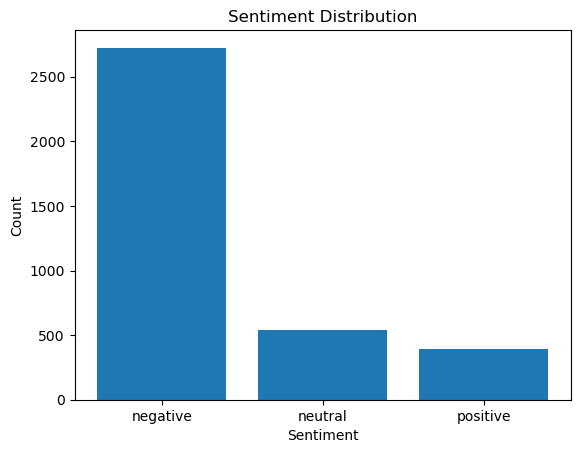

In [19]:
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

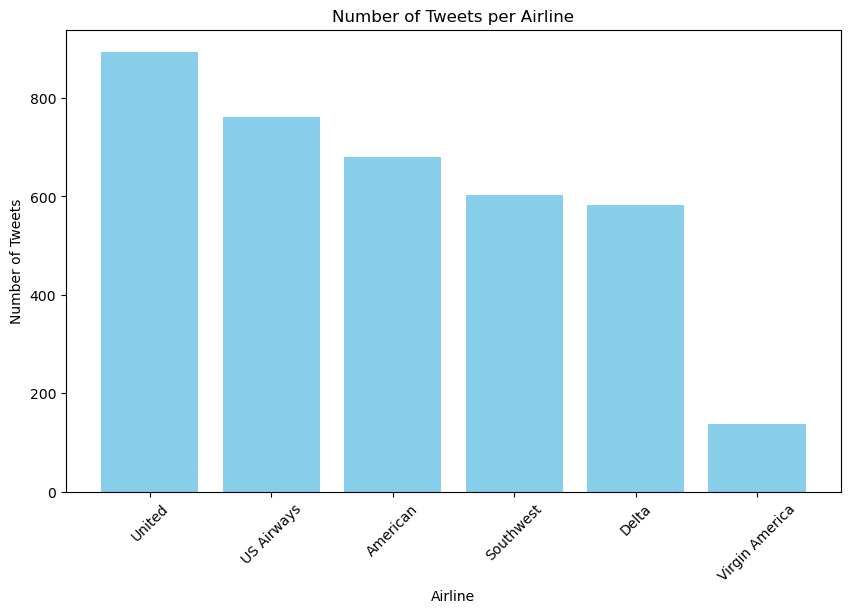

In [20]:
#which airlines have the most tweets, or compare their average retweet counts
airline_counts = df['airline'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(airline_counts.index, airline_counts.values, color='skyblue')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Airline')
plt.xticks(rotation=45)
plt.show()

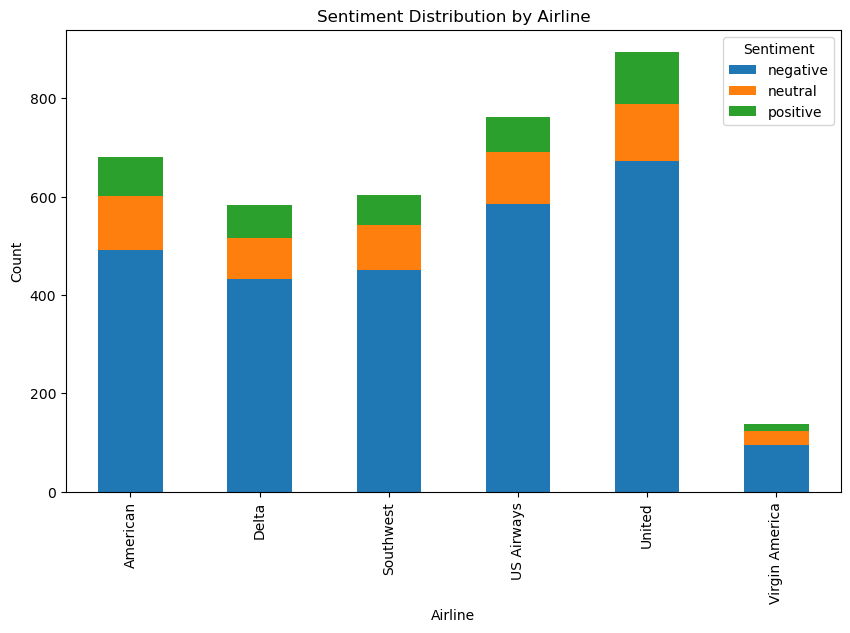

In [21]:
#Compare sentiment distribution across different airlines
sentiment_airline = df.groupby('airline')['sentiment'].value_counts().unstack()
sentiment_airline.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [22]:
import seaborn as sns

In [23]:
# Create a pivot table for the heatmap
location_sentiment = df.pivot_table(index='tweet_location', columns='sentiment', values='tweet_id', aggfunc='count', fill_value=0)


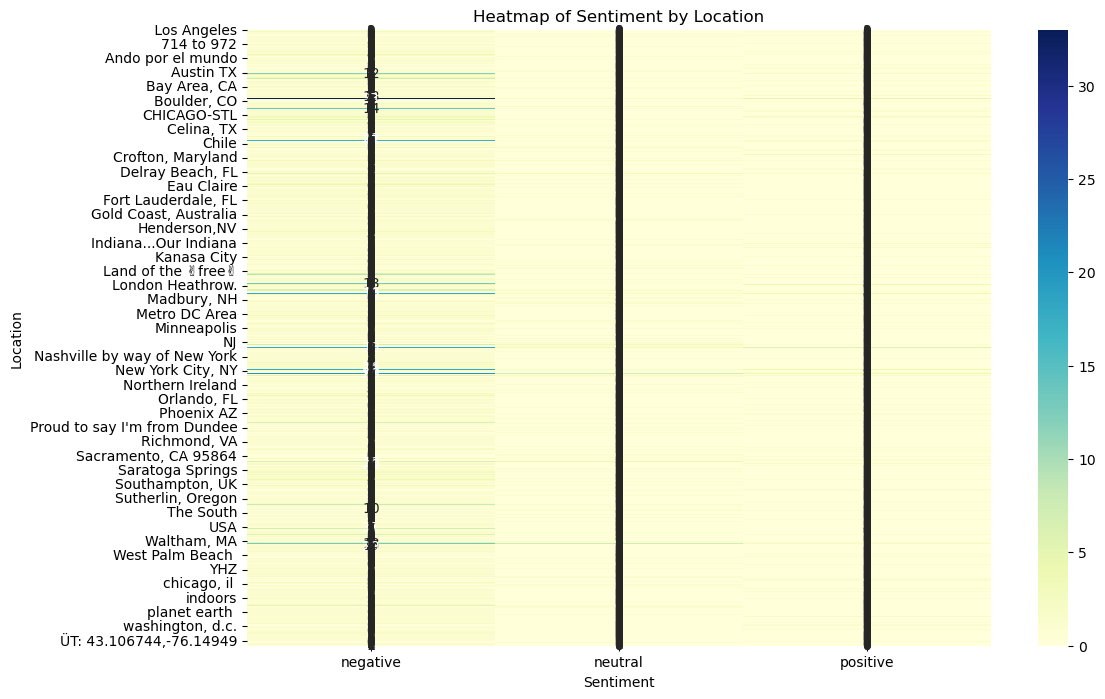

In [24]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(location_sentiment, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Sentiment by Location')
plt.xlabel('Sentiment')
plt.ylabel('Location')
plt.show()

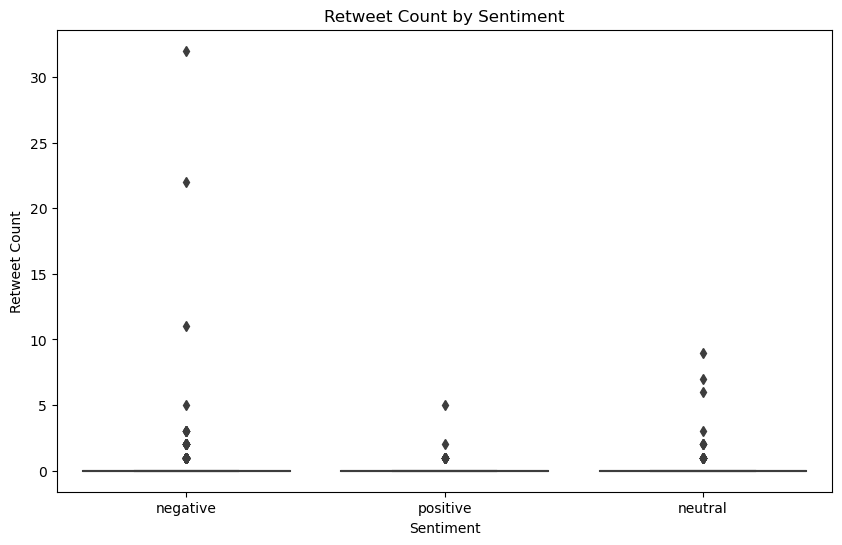

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='retweet_count', data=df)
plt.title('Retweet Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Retweet Count')
plt.show()